# Sources

Data compiled from over sources to be compared with twitter sentiment
* Google Trends
* Market Data

In [11]:
import sys, os
import pandas as pd
import pandas_datareader as pdr
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from pytrends.request import TrendReq 
import matplotlib.dates as mdates
pytrend = TrendReq()
from iexfinance.refdata import get_symbols
from iexfinance.stocks import Stock
from iexfinance.stocks import get_historical_data
from iexfinance.altdata import get_social_sentiment
from datetime import datetime

# Google Trends

Data retrieved from google trends - saved data to csv files to reduce the number of request being made

## Popular Queries 

The top 50 queries related to the words coronavirus and covid-19

In [3]:
# words to search for
keywords = ['coronavirus','covid-19']

# Obtaining the payload
pytrend.build_payload(keywords, timeframe='2020-01-01 2020-03-20')

# Obtaining related queries
related = pytrend.related_queries()
searches = related[keywords[0]]['top']['query'].append(related[keywords[1]]['top']['query'])
searches = searches.reset_index().drop(columns=["index"])['query']
print(searches)
searches = searches.to_list()
searches.extend(keywords)

0                      corona
1          coronavirus update
2        coronavirus symptoms
3            coronavirus news
4           coronavirus cases
5                corona virus
6              uk coronavirus
7                       china
8           china coronavirus
9             coronavirus map
10         italia coronavirus
11             el coronavirus
12         france coronavirus
13       sintomas coronavirus
14          coronavirus india
15             us coronavirus
16    symptoms of coronavirus
17            usa coronavirus
18          italy coronavirus
19         coronavirus españa
20           coronavirus live
21          coronavirus death
22           coronavirus tips
23        what is coronavirus
24         coronavirus latest
25       covid-19 coronavirus
26                      covid
27             covid-19 cases
28                   covid 19
29             covid-19 virus
30               covid-19 map
31          covid-19 symptoms
32              covid-19 news
33        

## Interest by Region

* Results given by google trends are *relative search volumes* RSVs
* They are standardizing for each request from 0 to 100, where 100 represents the highest share of a term over a time series (2020-01-01 2020-03-20)
* The maximum value of the index is set to be 100
* For example, if one data point is 50 and another data point is 100, this means that the number of searches satisfying the condition was half as large for the first data point as for the second data point.

In [4]:
# only allowed 5 words max per request 
# pytrend.build_payload(kw_list, timeframe='2020-01-01 2020-03-20')

# Interest by Region
# df = pytrend.interest_by_region(inc_low_vol=True)

# saving Data to a csv file
# df.to_csv(path_or_buf="../data/interest_by_region.csv",index=True)

# loading data from csv file
df = pd.read_csv(filepath_or_buffer="../data/interest_by_region.csv", index_col="geoName")

print(df)

                Coronavirus  covid-19
geoName                              
Afghanistan              97         3
Albania                  99         1
Algeria                  99         1
American Samoa           98         2
Andorra                 100         0
...                     ...       ...
Western Sahara           95         5
Yemen                    92         8
Zambia                   98         2
Zimbabwe                 98         2
Åland Islands            97         3

[250 rows x 2 columns]


## Global Historical Interest

* Numbers represent search interest relative to the highest point on the chart for the given region and time. 
* A value of 100 is the peak popularity for the term 
* A value of 50 means that the term is half as popular
* A score of 0 means there was not enough data for this term
* Data is given hourly I average over each day to plot it

Text(0, 0.5, 'Popularity')

<Figure size 432x288 with 0 Axes>

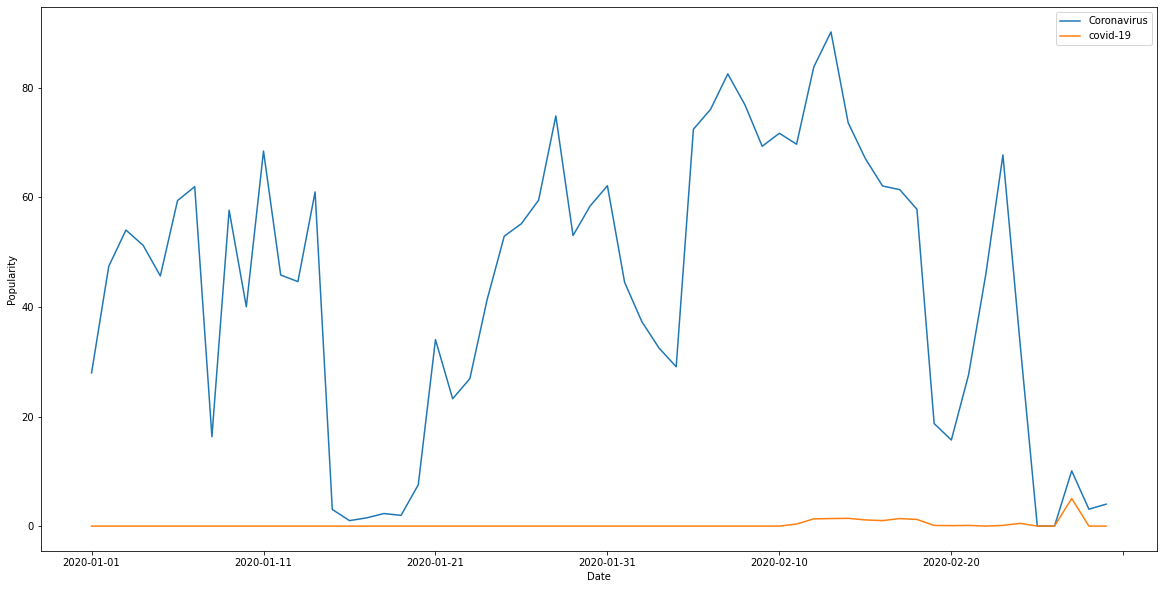

In [21]:
# retriveing data from google
# pytrend.build_payload(kw_list, timeframe='2020-01-01 2020-03-20')

# getting historical interest 
# df = pytrend.get_historical_interest(kw_list, year_start=2020, month_start=1, day_start=1, hour_start=0, year_end=2020, month_end=3, day_end=20, hour_end=0, cat=0, geo='', gprop='', sleep=0)
# df = df.reset_index()

# Seperating Date into Date and Time Columns
# df['Date'] = df['date'].dt.date
# df['Time'] = df['date'].dt.time
# df = df.drop(['date'], axis=1)
# df = df.set_index('Date')

# saving Data to a csv file
# df.to_csv(path_or_buf="../data/historical_interest.csv",index=True)

# loading data from csv file
df = pd.read_csv(filepath_or_buffer="../data/historical_interest.csv", index_col="Date")

# averaging the scores over each day
df_averaged =  df.groupby(['Date']).mean()

# plotting graph
plt.figure()
ax = df_averaged.plot(figsize=(20,10))
ax.set_ylabel('Popularity')

# Market Data

In [21]:
start = datetime(2020, 1, 1)
end = datetime(2020, 3, 20)

# getting secret token for API  from file
f= open("../iex_token.txt","r")
token = f.read().strip()

# get_symbols(output_format='pandas', token=token)
# batch = Stock(["DIJA", "AAPL"], token=token)

# df = get_historical_data(batch, start, end, output_format='pandas', token=token)

df = get_historical_data("DIA", start, end, token = token, close_only=True, output_format='pandas')
print(df)


             close    volume
date                        
2020-01-02  288.62   3871798
2020-01-03  286.32   3296709
2020-01-06  286.98   1648682
2020-01-07  285.74   1526173
2020-01-08  287.40   3138656
2020-01-09  289.56   1790626
2020-01-10  288.24   2989819
2020-01-13  289.02   1471574
2020-01-14  289.22   2202118
2020-01-15  290.35   2195108
2020-01-16  292.93   2522044
2020-01-17  293.27   2147389
2020-01-21  291.83   4476910
2020-01-22  291.81   2077014
2020-01-23  291.54   1872554
2020-01-24  289.80   3612534
2020-01-27  285.36   4129077
2020-01-28  287.29   2999200
2020-01-29  287.29   2137029
2020-01-30  288.54   3433177
2020-01-31  282.42   4885660
2020-02-03  283.98   3169335
2020-02-04  288.04   3004116
2020-02-05  292.86   3305903
2020-02-06  293.74   2857207
2020-02-07  291.19   3839279
2020-02-10  292.95   2877674
2020-02-11  292.94   1994456
2020-02-12  295.72   2804383
2020-02-13  294.82   2637966
2020-02-14  294.54   1861714
2020-02-18  292.95   2414999
2020-02-19  29